In [51]:
import pandas as pd


In [52]:
csv_path_happiness = "Resources/2017_happiness.csv"
csv_path_libraries = "Resources/lmw_data_09_Feb_2021.csv"

happiness_df = pd.read_csv(csv_path_happiness)
libraries_df = pd.read_csv(csv_path_libraries, encoding='latin-1')

In [53]:
happiness_df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [54]:
libraries_df = libraries_df.loc[(libraries_df["Data Year"] == "2017"), :]
libraries_df = libraries_df.dropna()

#libraries_df.drop(libraries_df[libraries_df["Metric Data"]=="NaN"].index, inplace=True)

#library_df = libraries_df.drop(libraries_df[libraries_df["Metric Data"] == "NaN"].index, inplace=False)

#test_df = libraries_df.loc[libraries_df["Metric Data"]=="NaN", :]
libraries_df

#test_df

,Library Type,Region,Country or Area,M49 Code,Metric,Metric Data,Data Year
33,Academic,Europe,Belgium,56,Libraries,140,2017
34,Academic,Europe,Belgium,56,Internet_Access,140,2017
35,Academic,Europe,Belgium,56,Staff,502,2017
37,Academic,Europe,Belgium,56,Users,239338,2017
38,Academic,Europe,Belgium,56,Visits,5441703,2017
...,...,...,...,...,...,...,...
8614,Other,Oceania,Australia,36,Internet_Access,2350,2017
8624,Other,Oceania,Kiribati,296,Libraries,10,2017
8625,Other,Oceania,Kiribati,296,Internet_Access,1,2017
8626,Other,Oceania,Kiribati,296,Staff,7,2017


In [55]:
combined_df = pd.merge(happiness_df, libraries_df, how='left', left_on=["Country"], right_on=["Country or Area"])
combined_df

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Library Type,Region,Country or Area,M49 Code,Metric,Metric Data,Data Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,National,Europe,Iceland,352.0,Staff,70,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Academic,Europe,Finland,246.0,Libraries,152,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,Public,Africa,Burundi,108.0,Internet_Access,1,2017
749,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,Public,Africa,Burundi,108.0,Staff,2,2017
750,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,Public,Africa,Burundi,108.0,Volunteers,0,2017
751,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,Public,Africa,Burundi,108.0,Visits,5400,2017


In [56]:
combined_df = combined_df.dropna()
combined_df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Library Type,Region,Country or Area,M49 Code,Metric,Metric Data,Data Year
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,National,Europe,Iceland,352.0,Staff,70,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Academic,Europe,Finland,246.0,Libraries,152,2017
5,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Academic,Europe,Finland,246.0,Internet_Access,152,2017
6,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Academic,Europe,Finland,246.0,Staff,1307,2017
7,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Academic,Europe,Finland,246.0,Users,1073494,2017


In [57]:
library_visits_df = libraries_df.loc[libraries_df["Metric"]=="Visits", :]

#library_visits_df.dropna()
library_visits_df["Metric Data (INT)"] = library_visits_df["Metric Data"].astype(int)


#library_visits_df.head(100)
type_group_df = library_visits_df.groupby(["Library Type"]).sum()

type_group_df

<ipython-input-57-e188a6083160>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  library_visits_df["Metric Data (INT)"] = library_visits_df["Metric Data"].astype(int)


,M49 Code,Metric Data (INT)
Library Type,,
Academic,10306,155850188
Community,1612,2548722
National,8095,18465884
Other,3868,3549043
Public,12889,314054339
School,3256,135045600


In [58]:
# PAM CODE HERE - start

In [59]:
# PAM CODE HERE - end

In [ ]:
# ZOE CODE HERE - start

In [ ]:
# ZOE CODE HERE - end

In [ ]:
# MALLORY CODE HERE - start

In [ ]:
# MALLORY CODE HERE - end

In [132]:
#ELLIE CODE HERE - start
import matplotlib.pyplot as plt
import numpy as np

In [133]:
libraries_df["Metric Data"] = pd.to_numeric(libraries_df["Metric Data"],errors="coerce")

In [134]:
#create DF to show only country and number of visits?
visits_df = libraries_df.loc[libraries_df["Metric"]=="Visits", :]
visits_df.dtypes

Library Type       object
Region             object
Country or Area    object
M49 Code            int64
Metric             object
Metric Data         int64
Data Year          object
dtype: object

In [164]:
grouped_visits_df = visits_df.groupby(['Country or Area'])
print(grouped_visits_df)
grouped_visits_df=grouped_visits_df.sum().head(20)


In [165]:
visit_number=grouped_visits_df.groupby(['Country or Area'])
new_visits_df=visit_number.sum()
new_visits_df = pd.DataFrame(grouped_visits_df["Metric Data"])
new_visits_df


,Metric Data
Country or Area,
Australia,11580130
Bahamas,35232
Belgium,5541409
Benin,11953
Bulgaria,594934
Burundi,5400
Cambodia,13000
"China, Hong Kong Special Administrative Region",50683616
"China, Macao Special Administrative Region",5374474


In [175]:
x_axis = np.arange(len(new_visits_df))
tick_locations = [value+0.5 for value in x_axis]

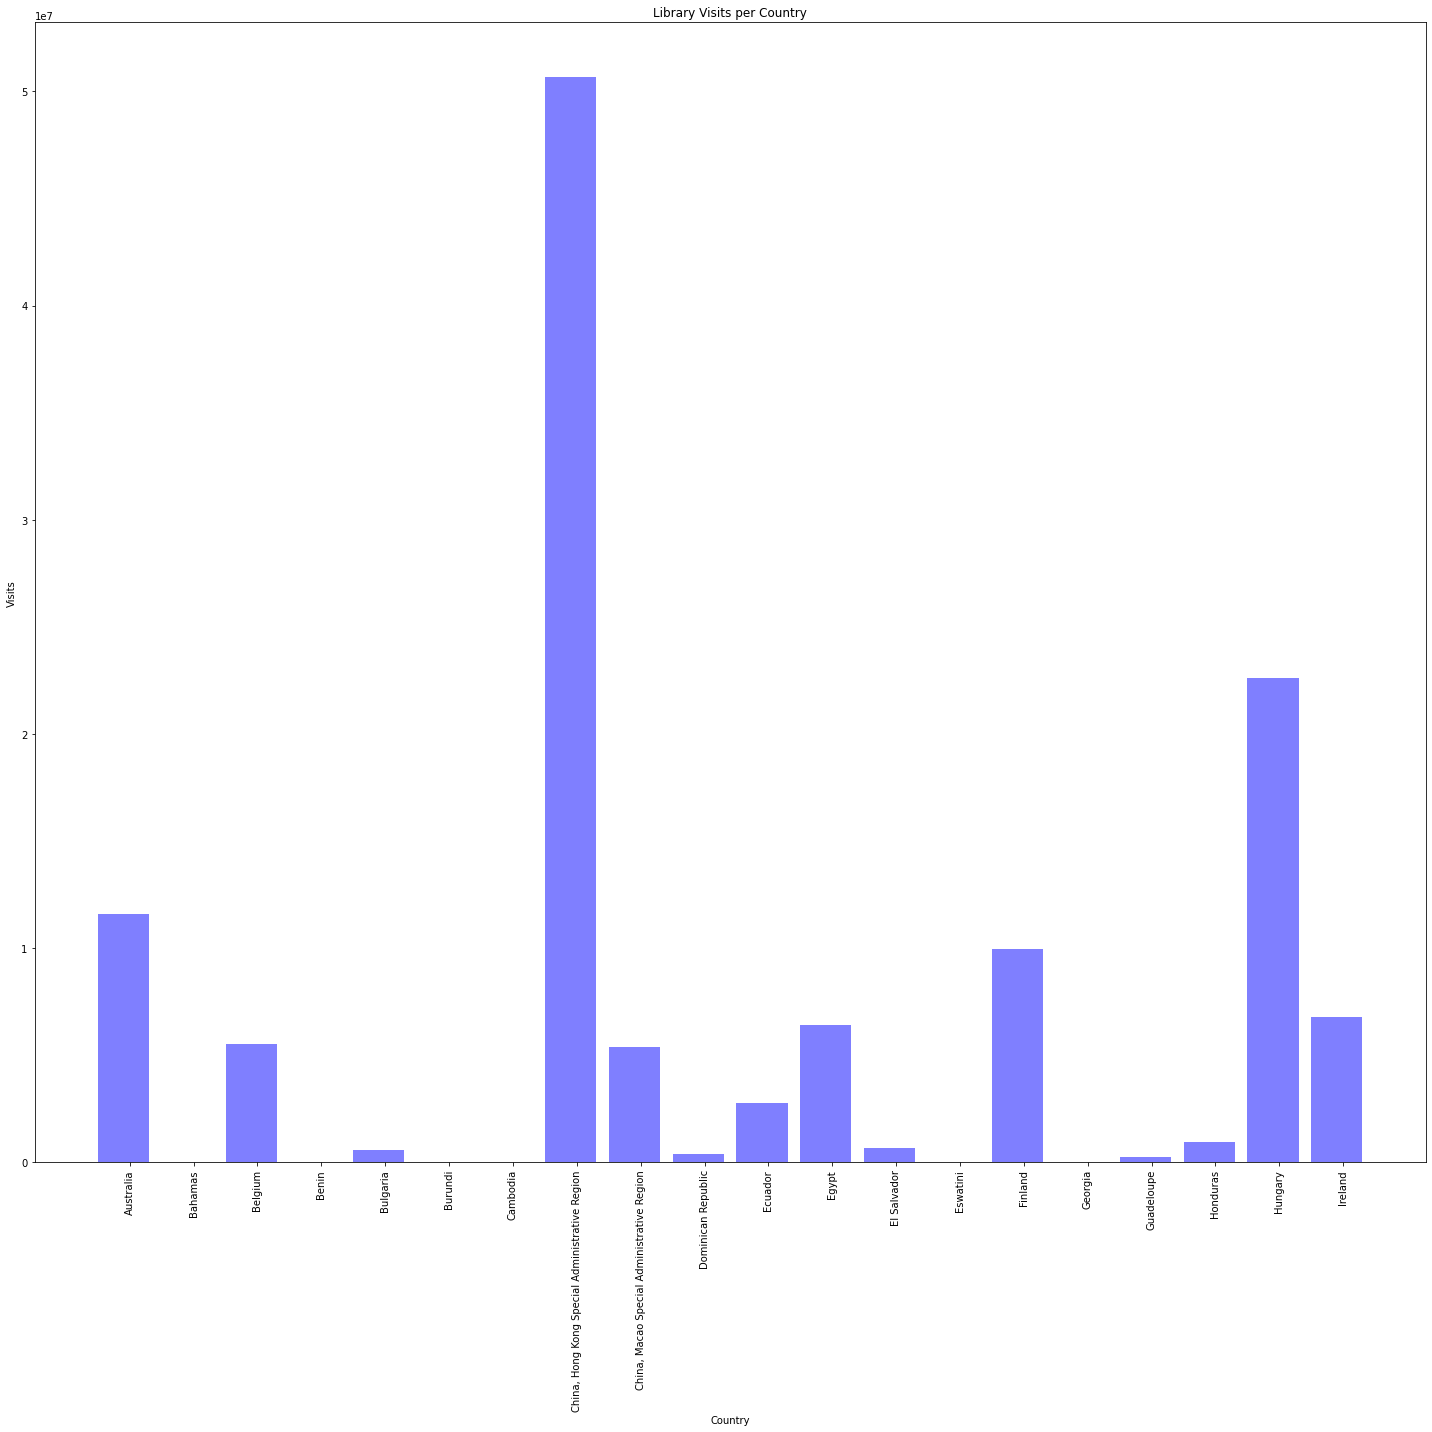

In [182]:
# Library Visits per Country - Bar Graph 
plt.figure(figsize = (20,20))

plt.bar(x_axis,new_visits_df["Metric Data"],color='b',alpha=0.5, align='edge')
plt.xticks(tick_locations, new_visits_df.index,rotation="vertical")

plt.xlabel ("Country")
plt.ylabel ("Visits")
plt.title ("Library Visits per Country") 


#plt.xlim([])
#plt.ylim([])

plt.tight_layout()
plt.show()

In [ ]:
# ELLIE CODE HERE - end